© 2022 grdnr13 <grdnr17@gmail.com>



---


## 2-3. PCA and k-NN with MNIST


---



Load the dataset


*   source: https://www.kaggle.com/oddrationale/mnist-in-csv



In [14]:
import pandas as pd

df_train = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_train.csv')
df_test = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

Overview the dataset

In [15]:
df_train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_test.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test['label'])

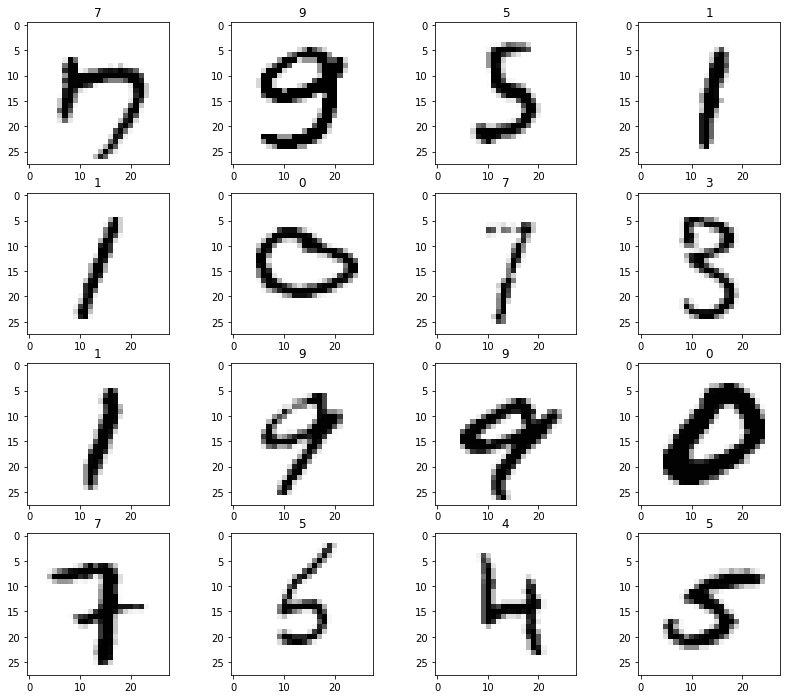

In [18]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, 60000), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_train[n].reshape(28, 28),
               cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.show()

## 1. Use k-NN to classifiy the MNIST dataset and report the accuracy and time to elapse for the classification

- Use scikit-learn library if you'd like
- Use k=10
* Train:Test = 75:25

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import time

classifier = KNeighborsClassifier(n_neighbors = 10)

t1 = time.time()

classifier.fit(X_train, y_train)
print('fit time : ', time.time() - t1)

fit time :  0.009980916976928711


In [20]:
t2 = time.time()
print("train accuracy: ", classifier.score(X_train, y_train))
print('training time : ', time.time() - t2)

train accuracy:  0.975
training time :  152.0548801422119


In [21]:
t3 = time.time()
print("test accuracy: ", classifier.score(X_test, y_test))
print('testing time : ', time.time() - t3)

test accuracy:  0.9665
testing time :  25.723137140274048


## 2. Let's use PCA + k-NN to reduce the dimension and GridSearchCV to select the optimal number of principal components and k in k-NN.
*   To use PCA + k-NN together, use the following pipe as the esimater of GridSearchCV.

    *   pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

*   Use the following parameter to find the optimal number of principal components and k 

  *   parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

*   Use 5 fold cross valiation in GridSearchCV

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('pca', PCA()),('clf', KNeighborsClassifier()),])
parameters = { 'pca__n_components' : [2, 5, 10], 'clf__n_neighbors' : [5, 10, 15] }


In [23]:
grid = GridSearchCV(pipe, param_grid=parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             scoring='accuracy')

## 3. Report the best accuracy and parameters

In [24]:
print('Best parameters: ', grid.best_params_)
print('Best score: ', grid.best_score_)

Best parameters:  {'clf__n_neighbors': 5, 'pca__n_components': 10}
Best score:  0.9281166666666667


## 4. Using the best estimator with the best parameters, re-evaluate the testing set and measure the time to elapse.


In [25]:
pipe2 = Pipeline([('pca', PCA(n_components=10)),('clf', KNeighborsClassifier(n_neighbors=10)),])

t1 = time.time()
pipe2.fit(X_train, y_train)

print('time : ', time.time() - t1) # time

time :  4.255548000335693


In [27]:
t2 = time.time()
print("train accuracy: ", pipe2.score(X_train, y_train))
print('training time : ', time.time() - t2)

train accuracy:  0.9449333333333333
training time :  11.091869831085205


In [28]:
t3 = time.time()
print("test accuracy: ", pipe2.score(X_test, y_test))
print('testing time : ', time.time() - t3)

test accuracy:  0.9287
testing time :  1.9598274230957031


## 5. Discuss whether the PCA improves the efficiency as well as effectiveness of the k-NN classifier

Yes, PCA improves the efficiency: 
time consumed to train data has decreased from about 152.05 sec(without PCA) to 11.09 sec(with PCA)

time consumed to test data has decreased from about 25.72 sec(without PCA) to about 1.96 sec(with PCA)

After using PCA, accuracy of the model slightly decreases from about 0.96 to about 0.93